In [1]:
import pandas as pd
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [2]:
###Laod data
df = pd.read_csv('../data/Finalplfam_id_Multilabel_Ecoli_data.csv', dtype=str, index_col=0)

In [4]:
df.shape

(2775, 16383)

In [5]:
Labeldf = pd.read_csv('../data/'+'AMR_LAbel_EColi.csv',index_col=0) 

In [6]:
Ycolumns=Labeldf.columns.values

In [7]:
len(Ycolumns)

35

In [8]:
Ycolumns

array(['genome_id', 'genome_name', 'taxon_id', 'ampicillin',
       'amoxicillin_clavulanic_acid', 'cefoxitin', 'ceftriaxone',
       'chloramphenicol', 'ciprofloxacin', 'gentamicin', 'streptomycin',
       'tetracycline', 'trimethoprim_sulphamethoxazole', 'meropenem',
       'cefepime', 'ceftazidime', 'piperacillin_tazobactam', 'amikacin',
       'ampicillin_sulbactam', 'cefotaxime', 'cefalothin', 'ertapenem',
       'imipenem', 'levofloxacin', 'nitrofurantoin', 'tigecycline',
       'cefazolin', 'aztreonam', 'cefuroxime', 'tobramycin',
       'trimethoprim', 'amoxicillin', 'colistin', 'norfloxacin',
       'sulfamethoxazole'], dtype=object)

In [9]:
Y=df[Ycolumns]
Y=Y.drop(columns=['genome_id', 'genome_name','taxon_id'])

X=df.drop(columns=Ycolumns)

In [10]:
Y

,ampicillin,amoxicillin_clavulanic_acid,cefoxitin,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,streptomycin,tetracycline,trimethoprim_sulphamethoxazole,...,tigecycline,cefazolin,aztreonam,cefuroxime,tobramycin,trimethoprim,amoxicillin,colistin,norfloxacin,sulfamethoxazole
1,1,NaN,NaN,0,0,0,0,1,1,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,NaN,0,1
2,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,1,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,1,0,1,NaN,1,NaN,...,0,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1
4,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,...,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN
5,NaN,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2772,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2773,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Y = Y.replace(to_replace=['Susceptible', 'Intermediate', 'Resistant','susceptible', 'intermediate', 'resistant'], value=[0, 1, 1,0, 1, 1])

In [12]:
##Convert Nan to -1 for Data analysis propose only
Y=Y.fillna(-1)

In [13]:
Labellist=Ycolumns.tolist()
Labellist.remove('genome_id')
Labellist.remove('genome_name')
Labellist.remove('taxon_id')

In [14]:
###Data distribution check
for index, label in enumerate(Labellist):
    V= Y[label].value_counts()
    if(index==0):
        df_val_counts = pd.DataFrame(V)
    else:
        df_val_counts_t = pd.DataFrame(V)
        df_val_counts = df_val_counts.join(df_val_counts_t)
        
print (df_val_counts)
df_val_counts.to_csv('../data/Input_Label_Supplementry.csv')

     ampicillin  amoxicillin_clavulanic_acid  cefoxitin  ceftriaxone  \
1          1395                          700        199          247   
-1          826                          641       2180         2287   
0           550                         1378        363          239   
0.5           4                           56         33            2   

     chloramphenicol  ciprofloxacin  gentamicin  streptomycin  tetracycline  \
1                121            635         335           130           271   
-1              2424            808         810          2545          2356   
0                225           1305        1583            86           146   
0.5                5             27          47            14             1   

     trimethoprim_sulphamethoxazole  ...  tigecycline  cefazolin  aztreonam  \
1                               242  ...            2        186        104   
-1                             2373  ...         1616       2499       2274   
0     

In [15]:
######Check number of full labelled data

In [16]:
###Laod data
Y=df[Ycolumns]
Y=Y.drop(columns=['genome_id', 'genome_name','taxon_id'])

In [17]:
Y=Y.dropna()
len(Y)

0

In [18]:
kfold = KFold(n_splits=5)
scorelist=[]

In [19]:
def hamming_score(y_pred,y_true):
    i=0
    scorelist=[]
    for  amrtrue in y_true:
        match=0.0
        total=0.0
        #print(amrtrue, y_pred[i])
        j=0
        for trueentry in amrtrue:
            #print(trueentry)
            if (trueentry == y_pred[i][j]):
                #print ('match found')
                match=match+1
                total=total+1
            elif (not (np.isnan(trueentry))):
                total = total + 1
            j=j+1
        i=i+1
        #print (match, total, (match/total))
        scorelist.append(match/total)
    return np.mean(scorelist)

In [20]:
import numpy as np
def Modified_F1_Score(y_pred,y_true):
    #i=0
    scorelist=[]
    for  i,amrtrue in enumerate(y_true):
        TP,FP,TN,FN=0.00000001,0.00000001,0.00000001,0.00000001
        #j=0
        for j,trueentry in enumerate(amrtrue):
            if ((np.isnan(trueentry))):
                continue
            elif ((trueentry == 1) and (y_pred[i][j]==1)):
                TP=TP+1
            elif ((trueentry == 1) and (y_pred[i][j]==0)):
                FN=FN+1
            elif ((trueentry == 0) and (y_pred[i][j]==0)):
                TN=TN+1
            elif ((trueentry == 0) and (y_pred[i][j]==1)):
                FP=FP+1
            #j=j+1
        #i=i+1
        precision=TP/(TP+FP)
        recall=TP/(TP+FN)
        fscore=(2*precision*recall)/(precision+recall)
        scorelist.append(fscore)
    return np.mean(scorelist)

In [21]:
#!pip install xgboost

In [22]:
####Impute Susceptble for missing lables

In [23]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

In [24]:
###Laod data
Y=df[Ycolumns]
Y=Y.drop(columns=['genome_id', 'genome_name','taxon_id'])

In [25]:
X=X.fillna(0)
X = X.apply(pd.to_numeric)

In [26]:
Y.columns

Index(['ampicillin', 'amoxicillin_clavulanic_acid', 'cefoxitin', 'ceftriaxone',
       'chloramphenicol', 'ciprofloxacin', 'gentamicin', 'streptomycin',
       'tetracycline', 'trimethoprim_sulphamethoxazole', 'meropenem',
       'cefepime', 'ceftazidime', 'piperacillin_tazobactam', 'amikacin',
       'ampicillin_sulbactam', 'cefotaxime', 'cefalothin', 'ertapenem',
       'imipenem', 'levofloxacin', 'nitrofurantoin', 'tigecycline',
       'cefazolin', 'aztreonam', 'cefuroxime', 'tobramycin', 'trimethoprim',
       'amoxicillin', 'colistin', 'norfloxacin', 'sulfamethoxazole'],
      dtype='object')

In [60]:
Y.shape

(2775, 32)

In [27]:
print("Before removing low variance: ", X.shape)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit_transform(X)
X = X[X.columns[selector.get_support()]].copy()
print("After removing low variance: ", X.shape)

Before removing low variance:  (2775, 16348)
After removing low variance:  (2775, 8763)


In [46]:
from sklearn.ensemble import AdaBoostClassifier
####Base models
svmmodel=SVC(class_weight='balanced',C=0.01,kernel='linear',gamma=1e-06,probability=True)
gaussianmodel=GaussianNB()
linearregressionmodel=LogisticRegression(solver='lbfgs',max_iter=10000)
rfmodel = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', random_state=1)
#xgbmodel = XGBClassifier(eta=0.0625, max_depth=16, eval_metric='mlogloss', use_label_encoder=False, seed=20211028)
xgbmodel = XGBClassifier(eta=0.0625, max_depth=16, eval_metric='mlogloss', seed=20211028)
sgdmodel = SGDClassifier(loss="hinge", penalty="l1", shuffle=True, max_iter=1500, class_weight="balanced", alpha=0.0001)
adaboostmodel = AdaBoostClassifier(n_estimators=100, random_state=0)
modellist=[svmmodel,gaussianmodel,linearregressionmodel,rfmodel,xgbmodel,sgdmodel,adaboostmodel]
namelist=['SVM','Gaussian','LinearRegression','randomforest','xgb','sgd','AdaBoost']

In [29]:
import time
times=[]
methods=[]

In [30]:
Y = Y.replace(to_replace=[0.5], value=[1])
Y = Y.replace(to_replace=['0.5'], value=[1])
Y = Y.replace(to_replace=['Not defined'], value=[np.nan])
Y = Y.replace(to_replace=['Susceptible-dose dependent'], value=[0.0])

In [31]:
###Binary relevance with different base models

In [32]:
from skmultilearn.problem_transform import BinaryRelevance

In [33]:
def BinaryRelevanceModel(X,Y,kfold, basemodel, name, times, methods):
    classifier = BinaryRelevance(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        start = time.process_time()
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        #y_test_tfidf=y_test_tfidf.astype(int)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)
        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        print(fscore, hammingscore)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'BR-'+name)
    print ('Base model for BR is {}'.format(name))
    print('Test Hamming accuracy for Binary relvance is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for Binary relvance is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist),np.std(hammingscorelist),np.std(fscorelist), times, methods


In [34]:
i=0
for basemodel in modellist:
    hamming, fscore, hmstd, fstd, times, methods=BinaryRelevanceModel(X,Y,kfold,basemodel,namelist[i], times, methods)
    i=i+1

0.6088565275881592 0.8447224483413742
0.5824834268661419 0.8379483366738268
0.5655651940069434 0.8371667249789024
0.5643202691573843 0.8404044240808947
0.5702441092073317 0.8447517543570174
Base model for BR is SVM
Test Hamming accuracy for Binary relvance is 0.8409987376864032
Test F-score accuracy for Binary relvance is 0.5782939053651921
Hamming std0.003233995410062292
F-Score std0.016575329785217516
0.47328415164536797 0.6931409435480194
0.44235256918314825 0.7041861826175552
0.4577583241724125 0.7092973729093441
0.4489252337526255 0.7000135124154732
0.4481313984262837 0.706368414286371
Base model for BR is Gaussian
Test Hamming accuracy for Binary relvance is 0.7026012851553526
Test F-score accuracy for Binary relvance is 0.4540903354359676
Hamming std0.005616678451635316
F-Score std0.01078720616602275
0.5973243857097907 0.8438609982407936
0.5750509129413759 0.8412366631974475
0.5452309464765139 0.8266187189897201
0.5610655215663779 0.848265766452041
0.5557373270854726 0.842110721

C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.629868557320669 0.8645590031566162
0.6333455822791694 0.8769636143655752
0.6117984219350592 0.8782799705606723
0.5929250744219013 0.867189764934863
0.6319559520438729 0.881884214451294
Base model for BR is xgb
Test Hamming accuracy for Binary relvance is 0.8737753134938042
Test F-score accuracy for Binary relvance is 0.6199787176001343
Hamming std0.006701064072681751
F-Score std0.015612514162356924
0.5698859627319507 0.8174447819460607
0.5428870459378439 0.8260473881062116


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5282672571945181 0.8128081885512226


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5366568258415821 0.8242273022174983


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5355762572520539 0.8254581182006363
Base model for BR is sgd
Test Hamming accuracy for Binary relvance is 0.821197155804326
Test F-score accuracy for Binary relvance is 0.5426546697915897
Hamming std0.005202257632146245
F-Score std0.014385221661441145
0.5988801656780915 0.8437786059162871
0.5950500895777652 0.8558421453029296
0.5857079897614214 0.8544112054973768
0.5635039990579496 0.8492054819505801
0.5768863853229013 0.8595507372932554
Base model for BR is AdaBoost
Test Hamming accuracy for Binary relvance is 0.8525576351920858
Test F-score accuracy for Binary relvance is 0.5840057258796258
Hamming std0.005503371565179702
F-Score std0.012783821367427563


In [35]:
#!pip install seaborn

In [36]:
from skmultilearn.problem_transform import LabelPowerset

In [37]:
def LabelPowerSetModel(X,Y,kfold, basemodel, name, times, methods):
    classifier = LabelPowerset(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        start = time.process_time()
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)
        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'LP-'+name)
        print(fscore, hammingscore)
    print ('Base model for LP is {}'.format(name))
    print('Test Hamming accuracy for LP is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for LP is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist), times,methods


In [38]:
i=0
for basemodel in modellist:
    hamming, fscore,times, methods=LabelPowerSetModel(X,Y,kfold,basemodel,namelist[i], times, methods)
    i=i+1

0.49961242162471686 0.7295045925970904
0.4819220027304498 0.7548317441454697
0.45994968100044703 0.7366861175168709
0.4826642570286437 0.7459197767040905
0.4785557555505824 0.7468265513337753
Base model for LP is SVM
Test Hamming accuracy for LP is 0.7427537564594594
Test F-score accuracy for LP is 0.4805408235869679
Hamming std0.008773205961455656
F-Score std0.012633907750562369
0.20413406939023218 0.6448731696046274
0.2509313855845633 0.6878587895254562
0.22040103815702308 0.6563216858314898
0.2221285162130058 0.6769476734672814
0.2570037521835084 0.6934794991528738
Base model for LP is Gaussian
Test Hamming accuracy for LP is 0.6718961635163457
Test F-score accuracy for LP is 0.23091975230566653
Hamming std0.018541683387432745
F-Score std0.01993109382216775
0.5361546947243468 0.808203083665573
0.5319385330019999 0.8132592957102761
0.52720048902059 0.8287002374360476
0.535068332886258 0.8332178008648597
0.5240189484031608 0.8160400926061402
Base model for LP is LinearRegression
Test 

C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5729338497379327 0.8388450377921819
0.5645307665156046 0.8358152435603416
0.5403133573253721 0.8458047897856978
0.5457033924647366 0.847426586936391
0.569163453806691 0.8510420519218249
Base model for LP is xgb
Test Hamming accuracy for LP is 0.8437867419992875
Test F-score accuracy for LP is 0.5585289639700675
Hamming std0.005620066510978399
F-Score std0.013060768367433327
0.4410715906424323 0.7609889318968603
0.4841204531055085 0.7928781984174141
0.46737681016241817 0.78613504988376
0.4649209423001562 0.7895433497394282
0.4570101711967886 0.7775328852057438
Base model for LP is sgd
Test Hamming accuracy for LP is 0.7814156830286413
Test F-score accuracy for LP is 0.4628999934814607
Hamming std0.011419710411791474
F-Score std0.014039965850574225
0.2357360533790491 0.6541444595280912
0.255833250063102 0.6763305239285632
0.28386342948136684 0.7037331862306062
0.2583330480315225 0.6876897775427188
0.2746002989625094 0.6891831576893496
Base model for LP is AdaBoost
Test Hamming accuracy

C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'BR-SVM'),
  Text(1, 0, 'BR-Gaussian'),
  Text(2, 0, 'BR-LinearRegression'),
  Text(3, 0, 'BR-randomforest'),
  Text(4, 0, 'BR-xgb'),
  Text(5, 0, 'BR-sgd'),
  Text(6, 0, 'BR-AdaBoost'),
  Text(7, 0, 'LP-SVM'),
  Text(8, 0, 'LP-Gaussian'),
  Text(9, 0, 'LP-LinearRegression'),
  Text(10, 0, 'LP-randomforest'),
  Text(11, 0, 'LP-xgb'),
  Text(12, 0, 'LP-sgd'),
  Text(13, 0, 'LP-AdaBoost')])

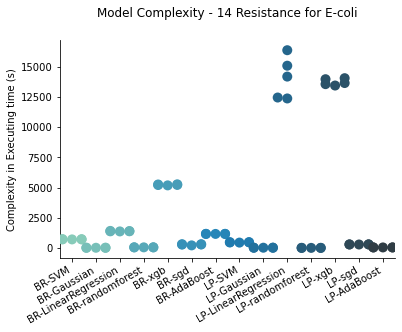

In [39]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.title("Model Complexity - 14 Resistance for E-coli", y=1.08)
sb.swarmplot(x=methods, y=times, palette="YlGnBu_d", size=10)
sb.despine()
plt.ylabel("Complexity in Executing time (s)")
plt.xticks(rotation=30, ha="right")

In [40]:
from skmultilearn.problem_transform import ClassifierChain

In [41]:
def ClassifierChainModel(X,Y,kfold, basemodel, name, times, methods):
    classifier = ClassifierChain(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        start = time.process_time()
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)

        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'CC-'+name)
        print(fscore, hammingscore)
    print ('Base model for CC is {}'.format(name))
    print('Test Hamming accuracy for CC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for CC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist), times, methods


In [42]:
#xgbmodel = XGBClassifier()
#modellist=[xgbmodel,sgdmodel]
#namelist=['xgb','sgd']

In [43]:
i=0
for basemodel in modellist:
    hamming, fscore,times, methods=ClassifierChainModel(X,Y,kfold,basemodel,namelist[i], times, methods)
    i=i+1

0.6061942632202739 0.8438310470087964
0.5853734874729557 0.837770258162415
0.5614080333372337 0.8376800065112758
0.572656383539831 0.8406408490722216
0.5681758683933369 0.844367983139913
Base model for CC is SVM
Test Hamming accuracy for CC is 0.8408580287789243
Test F-score accuracy for CC is 0.5787616071927262
Hamming std0.00285796910236016
F-Score std0.0157907930447121
0.45644994525591487 0.6861032240102999
0.4192885630614916 0.6973563657877383
0.4310674017208335 0.7001197862317573
0.4307126611141363 0.6941279298632239
0.42688523066728556 0.6985813848326748
Base model for CC is Gaussian
Test Hamming accuracy for CC is 0.6952577381451389
Test F-score accuracy for CC is 0.43288076036393236
Hamming std0.004983411937243231
F-Score std0.012523494753859847
0.5944733126421657 0.8433688980428112
0.5831075672557287 0.8437457466379036
0.5504385320840178 0.8305351598566253
0.5639075483675963 0.8508464691307829
0.552262935216449 0.8409560284044288
Base model for CC is LinearRegression
Test Hamm

C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [47]:
modellist=[xgbmodel,sgdmodel,adaboostmodel]
namelist=['xgb','sgd','AdaBoost']

In [48]:

i=0
for basemodel in modellist:
    hamming, fscore,times, methods=ClassifierChainModel(X,Y,kfold,basemodel,namelist[i], times, methods)
    i=i+1

0.6344131171242137 0.8680897181685758
0.6283815438586513 0.8720746013393073
0.6169658777466115 0.8822937413778487
0.5905091537776311 0.8680667349784997
0.6264786449568024 0.8799226962642855
Base model for CC is xgb
Test Hamming accuracy for CC is 0.8740894984257034
Test F-score accuracy for CC is 0.6193496674927819
Hamming std0.005960984019193855
F-Score std0.015471020070294593


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.570513092769522 0.8255761555335298


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5508208005238117 0.8251886066101752


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5350022720151102 0.8203668613059738


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.5433369984634341 0.8285698816090974
0.5479603939979701 0.8281191064008402
Base model for CC is sgd
Test Hamming accuracy for CC is 0.8255641222919234
Test F-score accuracy for CC is 0.5495267115539696
Hamming std0.0029228483180559228
F-Score std0.011779882049780626
0.5974083454141844 0.8399121669859094
0.601625357734994 0.8519471566040193
0.5848853487511364 0.8604330772545427
0.5610988403155233 0.8467911788009826
0.565155841512375 0.8563368739916728
Base model for CC is AdaBoost
Test Hamming accuracy for CC is 0.8510840907274254
Test F-score accuracy for CC is 0.5820347467456426
Hamming std0.007196959590093042
F-Score std0.01644065160920062


C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mt01034\Anaconda3\envs\MLEnv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'BR-SVM'),
  Text(1, 0, 'BR-Gaussian'),
  Text(2, 0, 'BR-LinearRegression'),
  Text(3, 0, 'BR-randomforest'),
  Text(4, 0, 'BR-xgb'),
  Text(5, 0, 'BR-sgd'),
  Text(6, 0, 'BR-AdaBoost'),
  Text(7, 0, 'LP-SVM'),
  Text(8, 0, 'LP-Gaussian'),
  Text(9, 0, 'LP-LinearRegression'),
  Text(10, 0, 'LP-randomforest'),
  Text(11, 0, 'LP-xgb'),
  Text(12, 0, 'LP-sgd'),
  Text(13, 0, 'LP-AdaBoost'),
  Text(14, 0, 'CC-SVM'),
  Text(15, 0, 'CC-Gaussian'),
  Text(16, 0, 'CC-LinearRegression'),
  Text(17, 0, 'CC-randomforest'),
  Text(18, 0, 'CC-xgb'),
  Text(19, 0, 'CC-sgd'),
  Text(20, 0, 'CC-AdaBoost')])

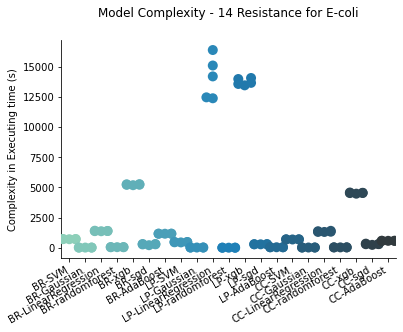

In [49]:
plt.title("Model Complexity - 14 Resistance for E-coli", y=1.08)
sb.swarmplot(x=methods, y=times, palette="YlGnBu_d", size=10)
sb.despine()
plt.ylabel("Complexity in Executing time (s)")
plt.xticks(rotation=30, ha="right")

In [50]:
from RectifiedClassifierChain import RectifiedClassiferChain

In [51]:
modellist=[svmmodel,gaussianmodel,linearregressionmodel,rfmodel,xgbmodel,sgdmodel,adaboostmodel]
namelist=['SVM','Gaussian','LinearRegression','randomforest','xgb','sgd','AdaBoost']

In [52]:
def RCCModelwithCE(X,Y,kfold, basemodel, name, times, methods, shapTotal, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        start = time.process_time()
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        #y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        classifier=RectifiedClassiferChain(basemodel,type=type, optimized=True,optimizedmethod='CrossEntropy')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'RCC_CE-'+name)
        label_order=classifier.getOptimizedLabelOrder()
        print(hammingscore, fscore)
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
        if(type==3):
            shapValue=classifier.getShapFeatures()
            shapTotal.append(shapValue)
            
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test_13.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
   
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top, times, methods, shapTotal


In [53]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_context("talk")
def plot_coefficients(feature_names, coef, name, top_features=20):
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    #top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients =top_positive_coefficients# np.hstack([top_positive_coefficients])
    # create plot
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances Multi AMR for "+str(name), y=1.08)
    colors = ['crimson' if c < 0 else 'cornflowerblue' for c in coef[top_coefficients]]
    plt.bar(np.arange(1 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    np.asarray(feature_names)[top_positive_coefficients]

In [54]:
import shap

0.8622180111864681 0.6513605233252818
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
0.865981500981501 0.6529957004245613
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_cla

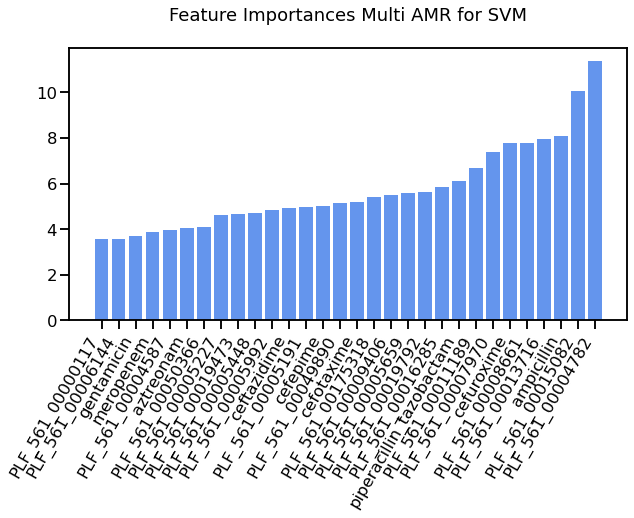

0.7442676544445513 0.5145123627462539
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
0.764113518280185 0.5066386078047648
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_cla

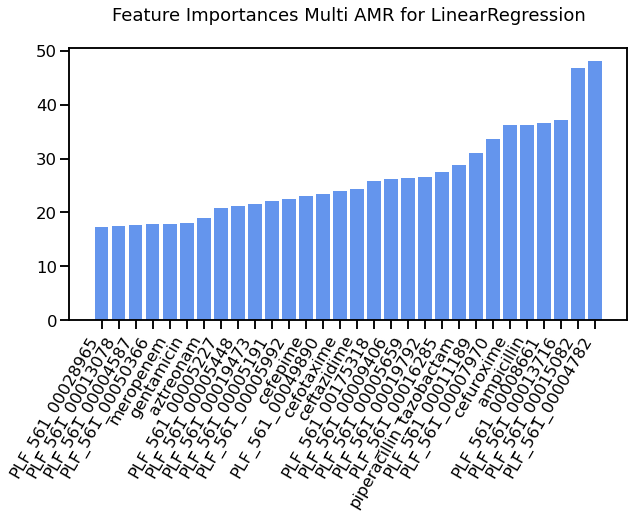

0.8589585084789689 0.6404339804574887
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
0.8695580040187884 0.6485614148920553
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_cl

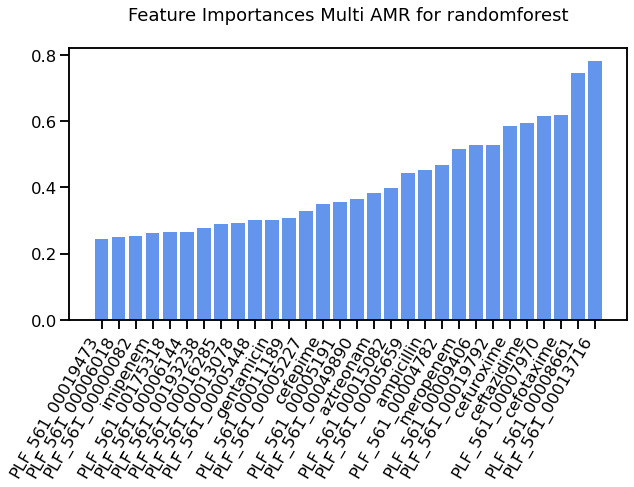

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.8979385877169337 0.6970772263055145
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.8959708639120403 0.6957937530799146
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_clavulanic_acid', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'amoxicillin', 'tetracycline', 'trimethoprim_sulphamethoxazole']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.916369798859479 0.7017582394344263
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'piperacillin_tazobactam', 'cefepime', 'nitrofurantoin', 'aztreonam', 'ampicillin', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'gentamicin', 'colistin', 'ceftriaxone', 'cefoxitin', 'tobramycin', 'norfloxacin', 'ampicillin_sulbactam', 'ciprofloxacin', 'levofloxacin', 'streptomycin', 'sulfamethoxazole', 'chloramphenicol', 'amoxicillin_clavulanic_acid', 'cefalothin', 'trimethoprim', 'amoxicillin', 'tetracycline', 'trimethoprim_sulphamethoxazole']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9043304065853086 0.6788205152080767
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefuroxime', 'ceftazidime', 'ampicillin', 'cefotaxime', 'gentamicin', 'cefazolin', 'tobramycin', 'norfloxacin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'levofloxacin', 'cefalothin', 'amoxicillin_clavulanic_acid', 'chloramphenicol', 'trimethoprim', 'tetracycline', 'amoxicillin', 'trimethoprim_sulphamethoxazole']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9050432748162367 0.6903454555256043
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'ceftazidime', 'cefotaxime', 'ampicillin', 'gentamicin', 'cefazolin', 'colistin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'norfloxacin', 'ampicillin_sulbactam', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'levofloxacin', 'cefalothin', 'amoxicillin_clavulanic_acid', 'tetracycline', 'chloramphenicol', 'trimethoprim', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
Base model for RCC is xgb
Test Hamming accuracy for RCC is 0.9039305863779996
Test F-score accuracy for RCC is 0.6927590379107074
Hamming std0.00714693176975218
F-Score std0.007860657355427694


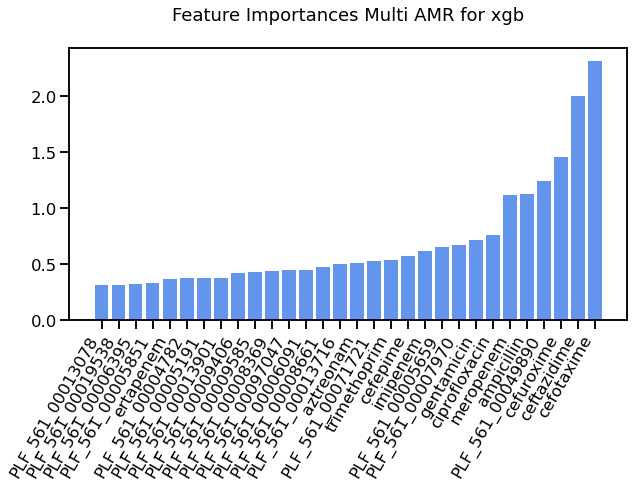

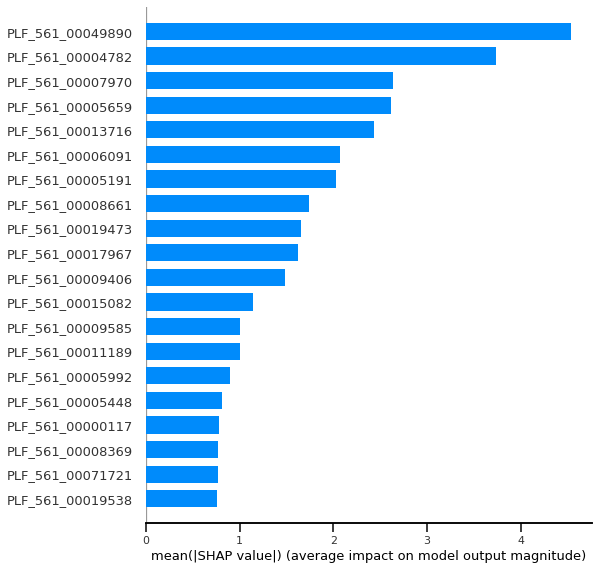

0.8514300493435191 0.6356742194717439
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8643406501739834 0.6474263560818011
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_clavulanic_acid', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'amoxicillin', 'tetracycline', 'trimethoprim_sulphamethoxazole']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8618361564826994 0.6312704111365345
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'piperacillin_tazobactam', 'cefepime', 'nitrofurantoin', 'aztreonam', 'ampicillin', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'gentamicin', 'colistin', 'ceftriaxone', 'cefoxitin', 'tobramycin', 'norfloxacin', 'ampicillin_sulbactam', 'ciprofloxacin', 'levofloxacin', 'streptomycin', 'sulfamethoxazole', 'chloramphenicol', 'amoxicillin_clavulanic_acid', 'cefalothin', 'trimethoprim', 'amoxicillin', 'tetracycline', 'trimethoprim_sulphamethoxazole']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8633546772272263 0.6311350114861423
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefuroxime', 'ceftazidime', 'ampicillin', 'cefotaxime', 'gentamicin', 'cefazolin', 'tobramycin', 'norfloxacin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'levofloxacin', 'cefalothin', 'amoxicillin_clavulanic_acid', 'chloramphenicol', 'trimethoprim', 'tetracycline', 'amoxicillin', 'trimethoprim_sulphamethoxazole']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8537673923535637 0.6071113859980912
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'ceftazidime', 'cefotaxime', 'ampicillin', 'gentamicin', 'cefazolin', 'colistin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'norfloxacin', 'ampicillin_sulbactam', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'levofloxacin', 'cefalothin', 'amoxicillin_clavulanic_acid', 'tetracycline', 'chloramphenicol', 'trimethoprim', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
Base model for RCC is sgd
Test Hamming accuracy for RCC is 0.8589457851161983
Test F-score accuracy for RCC is 0.6305234768348627
Hamming std0.0052952654529026515
F-Score std0.013124750354791017


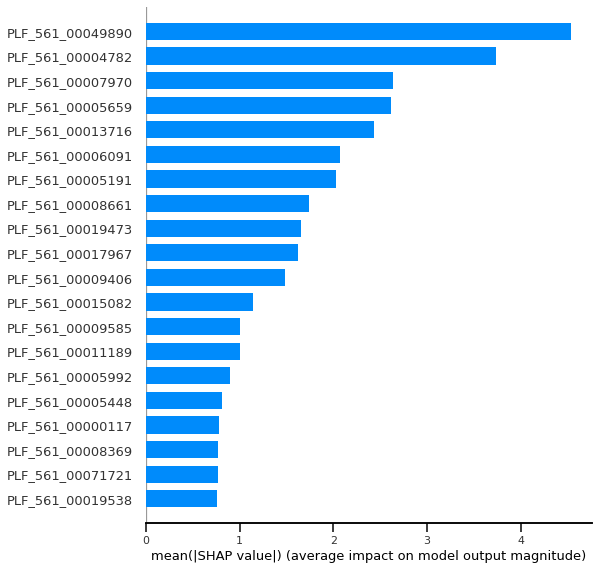

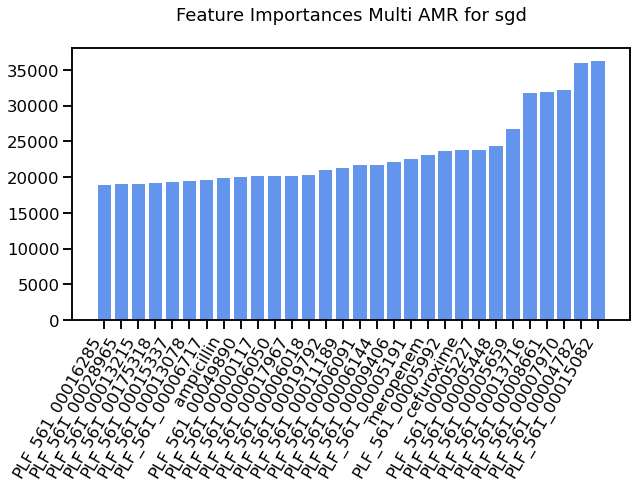

0.8767056188006742 0.662054321675553
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'nitrofurantoin', 'piperacillin_tazobactam', 'aztreonam', 'cefazolin', 'cefuroxime', 'cefotaxime', 'ceftazidime', 'ampicillin', 'gentamicin', 'cefoxitin', 'tobramycin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'norfloxacin', 'levofloxacin', 'ciprofloxacin', 'streptomycin', 'sulfamethoxazole', 'amoxicillin_clavulanic_acid', 'cefalothin', 'tetracycline', 'trimethoprim', 'chloramphenicol', 'amoxicillin', 'trimethoprim_sulphamethoxazole']
0.880014755014755 0.6778781636004472
['tigecycline', 'meropenem', 'amikacin', 'imipenem', 'ertapenem', 'cefepime', 'piperacillin_tazobactam', 'nitrofurantoin', 'aztreonam', 'cefuroxime', 'cefotaxime', 'gentamicin', 'ceftazidime', 'cefazolin', 'ampicillin', 'tobramycin', 'cefoxitin', 'ceftriaxone', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'ciprofloxacin', 'streptomycin', 'norfloxacin', 'levofloxacin', 'amoxicillin_clav

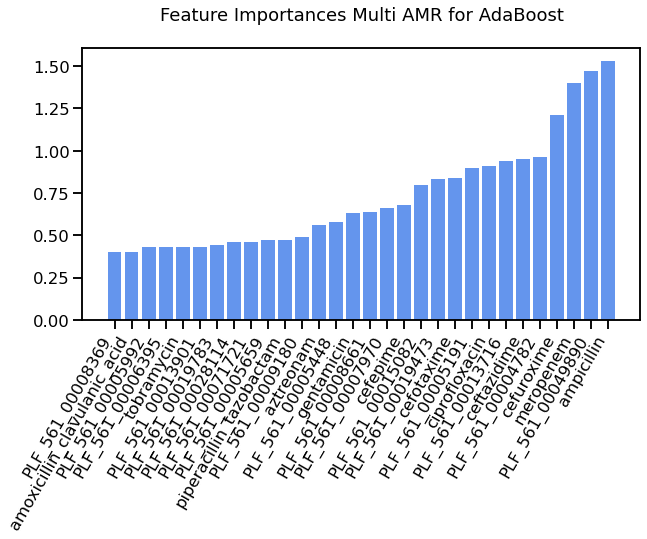

In [55]:
i=0
TotShape=[]
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='AdaBoost'):
        type=1
    elif(namelist[i] =='xgb'):
        type=3
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf, times, methods, TotShape=RCCModelwithCE(X,Y,kfold,basemodel,namelist[i],times, methods,TotShape, type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_all'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    if (type==3):
        TotShapedf = pd.DataFrame (np.vstack(TotShape), columns = [X.columns])
        shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar")
        fig = shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar", show=False)
        plt.savefig("summary_plot_"+str(namelist[i])+".png")
        TotShapedf.to_csv('Shape_Features_RCC_CE_all_'+str(namelist[i])+'.csv')
    i=i+1

In [56]:
def RCCModelwithCP(X,Y,kfold, basemodel, name, times, methods, shapTotal, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        start = time.process_time()
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        #y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        classifier=RectifiedClassiferChain(basemodel,type=type, optimized=True,optimizedmethod='ConditionalProb')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        
        #hammingscore1=hamming_score(np.array(prediction),y_test_tfidf.values)
        #fscore1=Modified_F1_Score(np.array(prediction),y_test_tfidf.values)
        
        print(hammingscore,fscore)
        #print(hammingscore1,fscore1)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'RCC_CP-'+name)
        label_order=classifier.getOptimizedLabelOrder()
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
        if(type==3):
            shapValue=classifier.getShapFeatures()
            shapTotal.append(shapValue)
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
    
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top, times, methods, shapTotal

0.8599602332914353 0.6474125758913242
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
0.8681420432400825 0.6528956680643223
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin

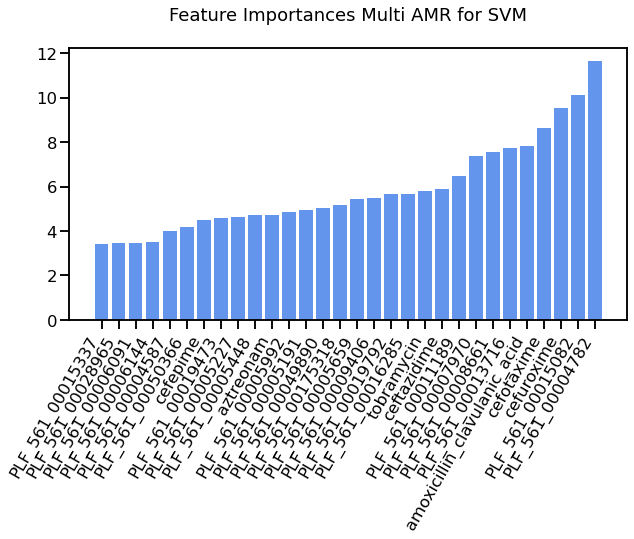

0.7440624492393462 0.5144741427081237
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
0.764113518280185 0.5066386078047648
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin'

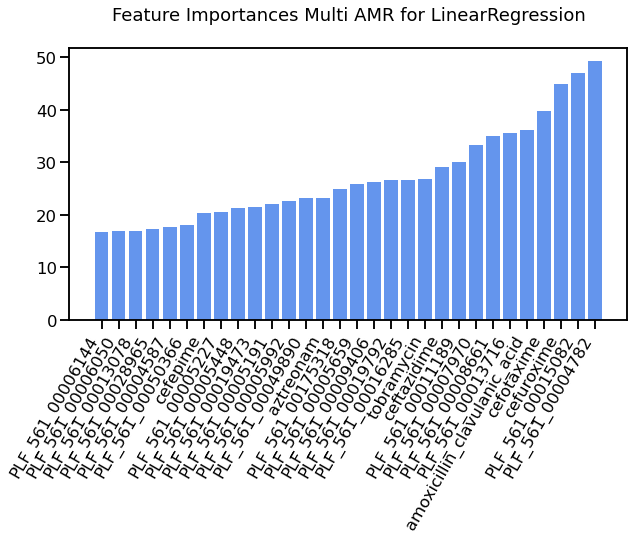

0.8578732450897839 0.6377841359654159
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
0.8731076747743414 0.6454258616225879
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin

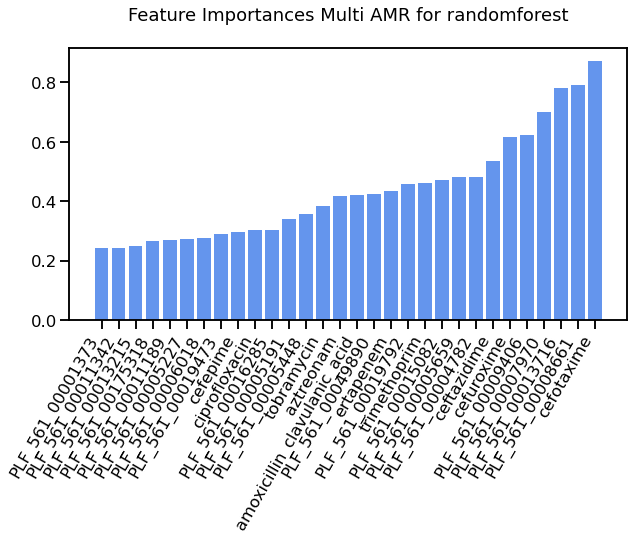

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.895204293015461 0.7026557994469825
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9013782677508168 0.7010455036985563
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9099368246323871 0.7009564637833754
['cefuroxime', 'cefotaxime', 'aztreonam', 'cefepime', 'ceftazidime', 'tobramycin', 'gentamicin', 'ciprofloxacin', 'norfloxacin', 'cefoxitin', 'ertapenem', 'amoxicillin_clavulanic_acid', 'piperacillin_tazobactam', 'meropenem', 'amikacin', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'chloramphenicol', 'cefalothin', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'streptomycin', 'amoxicillin', 'sulfamethoxazole', 'colistin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9067926362044009 0.6829793581177968
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'norfloxacin', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'amikacin', 'meropenem', 'tigecycline', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'chloramphenicol', 'cefalothin', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'tetracycline', 'ampicillin', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9134962790045349 0.7008996544261282
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'norfloxacin', 'ertapenem', 'ciprofloxacin', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'meropenem', 'amikacin', 'piperacillin_tazobactam', 'tigecycline', 'ceftriaxone', 'ampicillin_sulbactam', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
Base model for RCC is xgb
Test Hamming accuracy for RCC is 0.9053616601215202
Test F-score accuracy for RCC is 0.6977073558945678
Hamming std0.006452772559596435
F-Score std0.007393128091045034


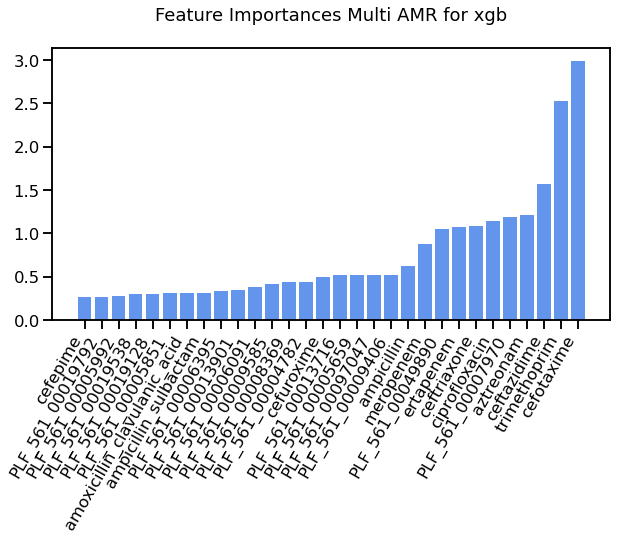

0.8548733811564161 0.6429923209024583
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
0.8623799066446126 0.6401813782622916
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8594788590273627 0.6247889066107956
['cefuroxime', 'cefotaxime', 'aztreonam', 'cefepime', 'ceftazidime', 'tobramycin', 'gentamicin', 'ciprofloxacin', 'norfloxacin', 'cefoxitin', 'ertapenem', 'amoxicillin_clavulanic_acid', 'piperacillin_tazobactam', 'meropenem', 'amikacin', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'chloramphenicol', 'cefalothin', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'streptomycin', 'amoxicillin', 'sulfamethoxazole', 'colistin']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8584922470706785 0.6263630513748599
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'norfloxacin', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'amikacin', 'meropenem', 'tigecycline', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'chloramphenicol', 'cefalothin', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'tetracycline', 'ampicillin', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.854786375039213 0.6113675527377015
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'norfloxacin', 'ertapenem', 'ciprofloxacin', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'meropenem', 'amikacin', 'piperacillin_tazobactam', 'tigecycline', 'ceftriaxone', 'ampicillin_sulbactam', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
Base model for RCC is sgd
Test Hamming accuracy for RCC is 0.8580021537876567
Test F-score accuracy for RCC is 0.6291386419776213
Hamming std0.002888460524382028
F-Score std0.011456894501862115


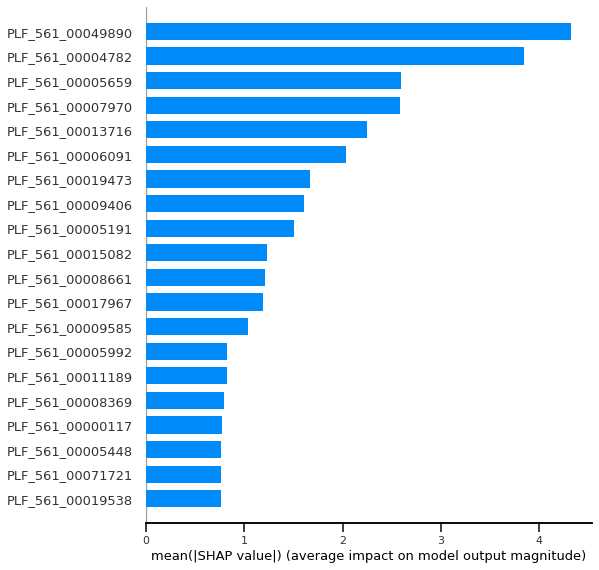

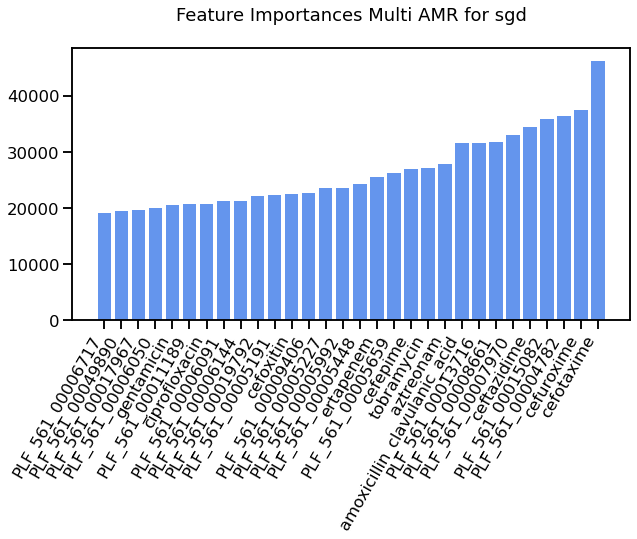

0.884757383323027 0.6798078429674637
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'ceftazidime', 'cefepime', 'gentamicin', 'ertapenem', 'cefoxitin', 'amoxicillin_clavulanic_acid', 'ciprofloxacin', 'norfloxacin', 'piperacillin_tazobactam', 'amikacin', 'meropenem', 'tigecycline', 'ampicillin_sulbactam', 'ceftriaxone', 'nitrofurantoin', 'imipenem', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'levofloxacin', 'cefazolin', 'trimethoprim_sulphamethoxazole', 'ampicillin', 'tetracycline', 'amoxicillin', 'streptomycin', 'sulfamethoxazole', 'colistin']
0.8873648858942977 0.6827283381462531
['cefuroxime', 'cefotaxime', 'aztreonam', 'tobramycin', 'cefepime', 'ceftazidime', 'gentamicin', 'ertapenem', 'cefoxitin', 'ciprofloxacin', 'amoxicillin_clavulanic_acid', 'tigecycline', 'meropenem', 'amikacin', 'norfloxacin', 'piperacillin_tazobactam', 'ampicillin_sulbactam', 'ceftriaxone', 'imipenem', 'nitrofurantoin', 'trimethoprim', 'cefalothin', 'chloramphenicol', 'cefazolin', 'levofloxacin'

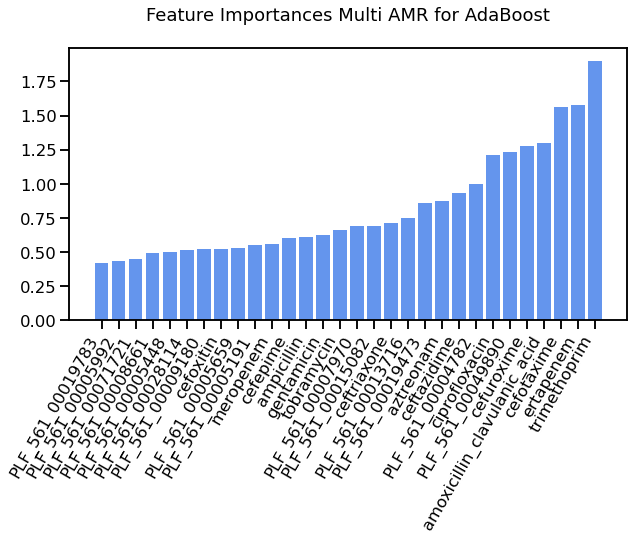

In [57]:
i=0
TotShape=[]
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='AdaBoost'):
        type=1
    elif(namelist[i] =='xgb'):
        type=3
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf, times, methods, TotShape=RCCModelwithCP(X,Y,kfold,basemodel,namelist[i],times, methods, TotShape, type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_PC'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    if (type==3):
        TotShapedf = pd.DataFrame (np.vstack(TotShape), columns = [X.columns])
        fig = shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar", show=False)
        plt.savefig("summary_plot_CP"+str(namelist[i])+".png")
        TotShapedf.to_csv('Shape_Features_RCC_CP_all_'+str(namelist[i])+'.csv')
    i=i+1

In [65]:
def RCCModelwithMR(X,Y,kfold, basemodel, name, times, methods,shapTotal, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        start = time.process_time()
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        y_train_tfidf = y_train_tfidf.apply(pd.to_numeric)
        #y_train_tfidf=y_train_tfidf.astype(int)
        y_test_tfidf = y_test_tfidf.apply(pd.to_numeric)
        classifier=RectifiedClassiferChain(basemodel,type=type,optimized=True,optimizedmethod='MissingRatio')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        
        #hammingscore1=hamming_score(np.array(prediction),y_test_tfidf.values)
        #fscore1=Modified_F1_Score(np.array(prediction),y_test_tfidf.values)
        
        print(hammingscore,fscore)
        #print(hammingscore1,fscore1)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        times = np.append(times, (time.process_time() - start))
        methods = np.append(methods, 'RCC_MR-'+name)
        label_order=classifier.getOptimizedLabelOrder()
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
        if(type==3):
            shapValue=classifier.getShapFeatures()
            shapTotal.append(shapValue)
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top, times, methods, shapTotal

0.8604803821811495 0.6439693286128229
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']
0.8682380151987995 0.6495848257497636
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nit

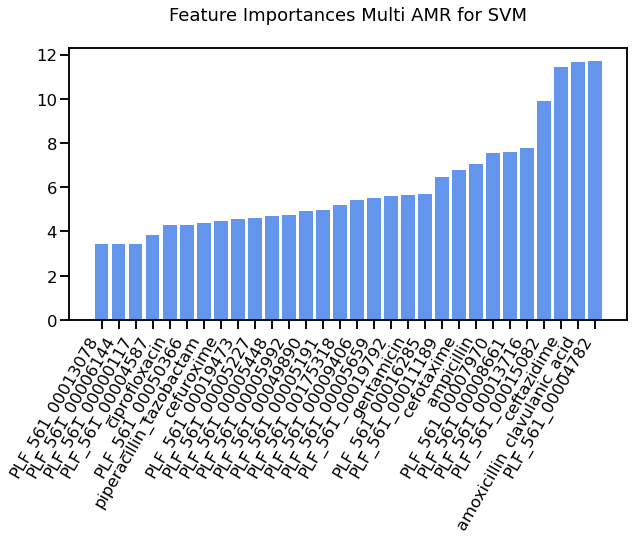

0.7432416284185254 0.5155115437452561
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']
0.7642136183802851 0.5068888580550063
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nit

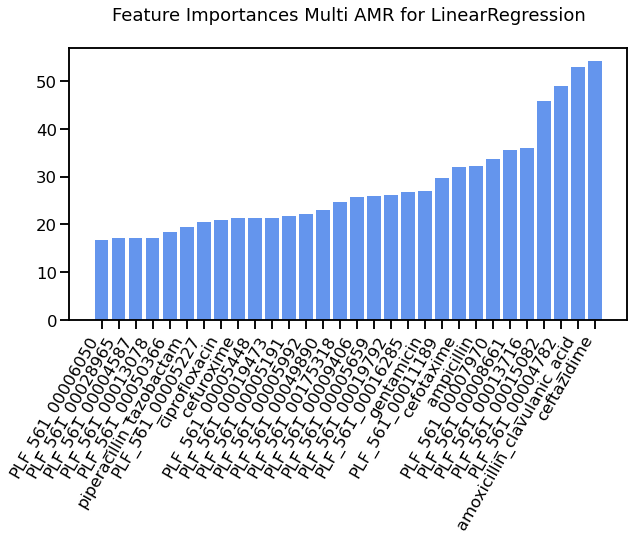

0.8562628269469702 0.6414318307626564
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']
0.8722217506531231 0.6459397338105736
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nit

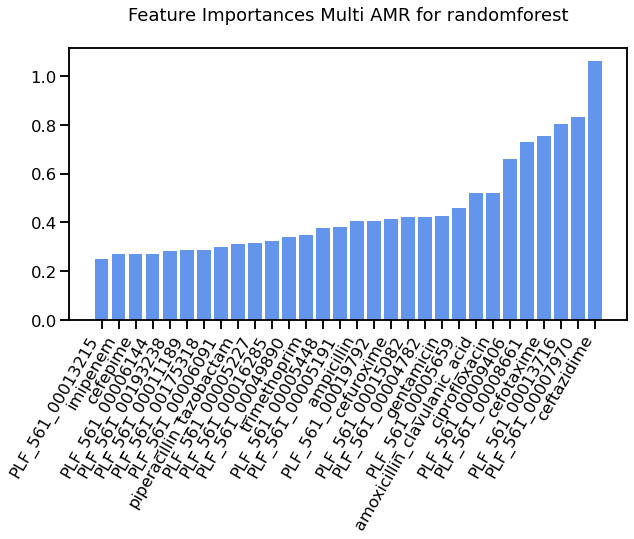

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.8975002692820254 0.7006027736303978
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9034854997600095 0.7018843594767921
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9171635586238268 0.7007924778085219
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'ceftriaxone', 'aztreonam', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'sulfamethoxazole', 'norfloxacin', 'ampicillin_sulbactam']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9042542421954187 0.6837947271715212
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'trimethoprim', 'amikacin', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9125607324317335 0.7010116500952133
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']
Base model for RCC is xgb
Test Hamming accuracy for RCC is 0.9069928604586028
Test F-score accuracy for RCC is 0.6976171976364893
Hamming std0.006990782442393454
F-Score std0.006925138779939275


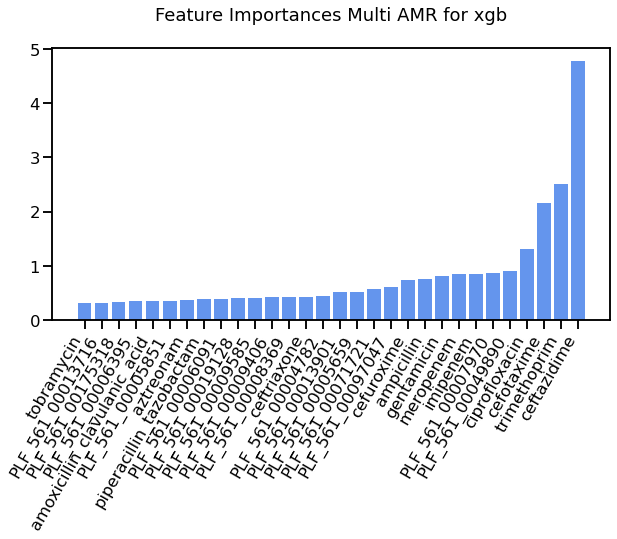

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8763 and the array at index 10 has size 1

In [59]:
i=0
TotShape=[]
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='AdaBoost'):
        type=1
    elif(namelist[i] =='xgb'):
        type=3
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf, times, methods, TotShape=RCCModelwithMR(X,Y,kfold,basemodel,namelist[i], times, methods, TotShape, type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_MR'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    if (type==3):
        TotShapedf = pd.DataFrame (np.vstack(TotShape), columns = [X.columns])
        shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar")
        fig = shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar", show=False)
        plt.savefig("summary_plot_MR_"+str(namelist[i])+".png")
        TotShapedf.to_csv('Shape_Features_RCC_MR_all_'+str(namelist[i])+'.csv')
    i=i+1

In [66]:
modellist=[xgbmodel,sgdmodel,adaboostmodel]
namelist=['xgb','sgd','AdaBoost']

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.8975002692820254 0.7006027736303978
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9034854997600095 0.7018843594767921
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9171635586238268 0.7007924778085219
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'ceftriaxone', 'aztreonam', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'sulfamethoxazole', 'norfloxacin', 'ampicillin_sulbactam']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9042542421954187 0.6837947271715212
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'trimethoprim', 'amikacin', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

0.9125607324317335 0.7010116500952133
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']
Base model for RCC is xgb
Test Hamming accuracy for RCC is 0.9069928604586028
Test F-score accuracy for RCC is 0.6976171976364893
Hamming std0.006990782442393454
F-Score std0.006925138779939275


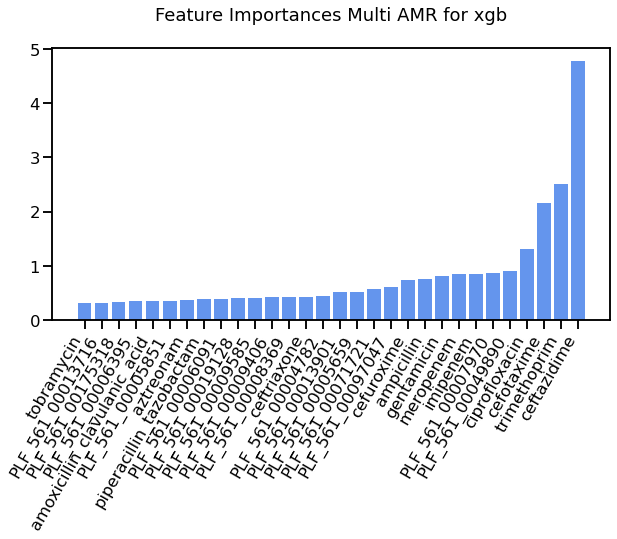

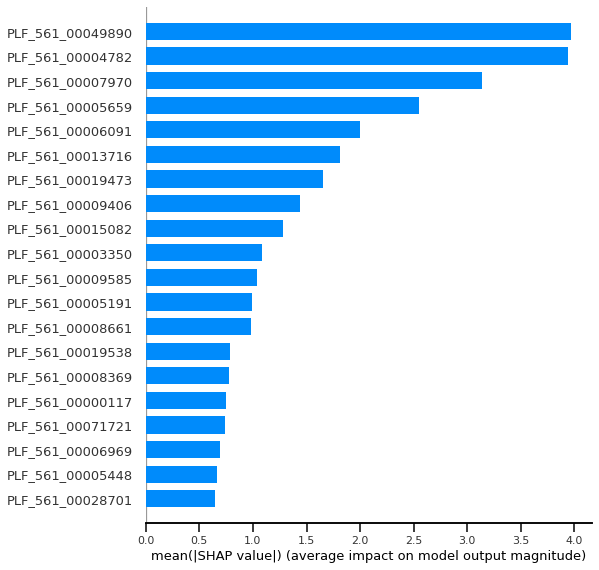

0.8558692297758794 0.6440379742121981
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8625757416443691 0.6461875724684256
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8601060552531141 0.6294092478359371
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'ceftriaxone', 'aztreonam', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'sulfamethoxazole', 'norfloxacin', 'ampicillin_sulbactam']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.862497248869798 0.6272254659202733
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'trimethoprim', 'amikacin', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.8523121526630298 0.6099140092930274
['amoxicillin_clavulanic_acid', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'norfloxacin', 'sulfamethoxazole', 'ampicillin_sulbactam']
Base model for RCC is sgd
Test Hamming accuracy for RCC is 0.8586720856412381
Test F-score accuracy for RCC is 0.6313548539459723
Hamming std0.004005781353318416
F-Score std0.01312568570770903


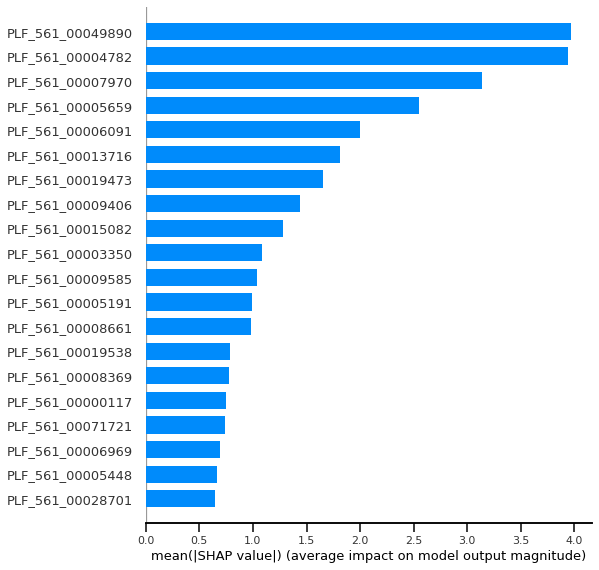

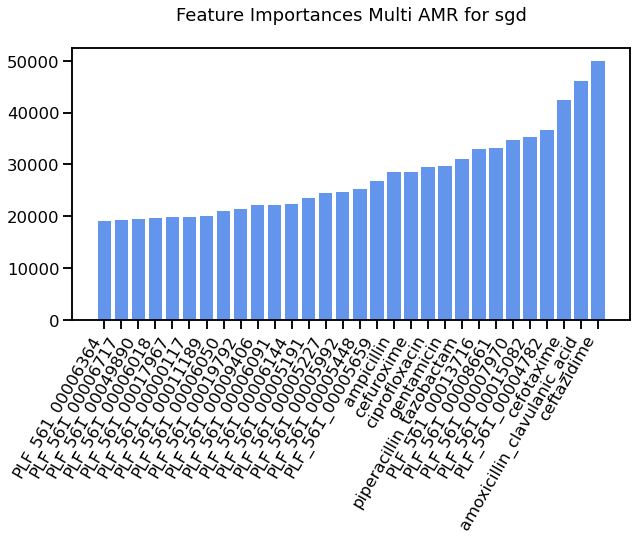

0.8869300551035418 0.6854928380182368
['amoxicillin_clavulanic_acid', 'ceftazidime', 'gentamicin', 'ciprofloxacin', 'ampicillin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'meropenem', 'tobramycin', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitrofurantoin', 'levofloxacin', 'cefazolin', 'streptomycin', 'colistin', 'ampicillin_sulbactam', 'sulfamethoxazole', 'norfloxacin']
0.8905609715903833 0.683225928410315
['amoxicillin_clavulanic_acid', 'ampicillin', 'ceftazidime', 'ciprofloxacin', 'gentamicin', 'cefotaxime', 'piperacillin_tazobactam', 'cefuroxime', 'tigecycline', 'imipenem', 'amoxicillin', 'tobramycin', 'meropenem', 'cefepime', 'amikacin', 'trimethoprim', 'cefalothin', 'cefoxitin', 'ertapenem', 'aztreonam', 'ceftriaxone', 'tetracycline', 'trimethoprim_sulphamethoxazole', 'chloramphenicol', 'nitr

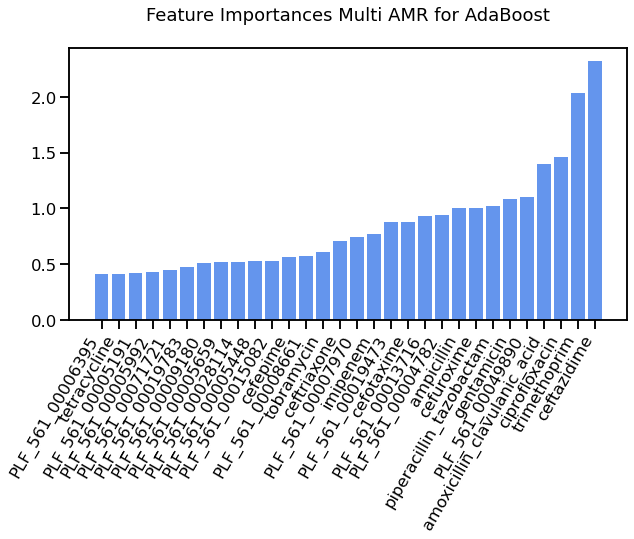

In [67]:
i=0
TotShape=[]
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='AdaBoost'):
        type=1
    elif(namelist[i] =='xgb'):
        type=3
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf, times, methods, TotShape=RCCModelwithMR(X,Y,kfold,basemodel,namelist[i], times, methods, TotShape, type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_MR'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    if (type==3):
        TotShapedf = pd.DataFrame (np.vstack(TotShape), columns = [X.columns])
        shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar")
        fig = shap.summary_plot(np.vstack(TotShape), features=X, feature_names=X.columns, plot_type="bar", show=False)
        plt.savefig("summary_plot_MR_"+str(namelist[i])+".png")
        TotShapedf.to_csv('Shape_Features_RCC_MR_all_'+str(namelist[i])+'.csv')
    i=i+1

80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BR-SVM'),
  Text(1, 0, 'BR-Gaussian'),
  Text(2, 0, 'BR-LinearRegression'),
  Text(3, 0, 'BR-randomforest'),
  Text(4, 0, 'BR-xgb'),
  Text(5, 0, 'BR-sgd'),
  Text(6, 0, 'BR-AdaBoost'),
  Text(7, 0, 'LP-SVM'),
  Text(8, 0, 'LP-Gaussian'),
  Text(9, 0, 'LP-LinearRegression'),
  Text(10, 0, 'LP-randomforest'),
  Text(11, 0, 'LP-xgb'),
  Text(12, 0, 'LP-sgd'),
  Text(13, 0, 'LP-AdaBoost'),
  Text(14, 0, 'CC-SVM'),
  Text(15, 0, 'CC-Gaussian'),
  Text(16, 0, 'CC-LinearRegression'),
  Text(17, 0, 'CC-randomforest'),
  Text(18, 0, 'CC-xgb'),
  Text(19, 0, 'CC-sgd'),
  Text(20, 0, 'CC-AdaBoost'),
  Text(21, 0, 'RCC_CE-SVM'),
  Text(22, 0, 'RCC_CE-Gaussian'),
  Text(23, 0, 'RCC_CE-LinearRegression'),
  Text(24, 0, 'RCC_CE-randomforest'),
  Text(25, 0, 'RCC_CE-xgb'),
  Text(26, 0, 'RCC_CE-s

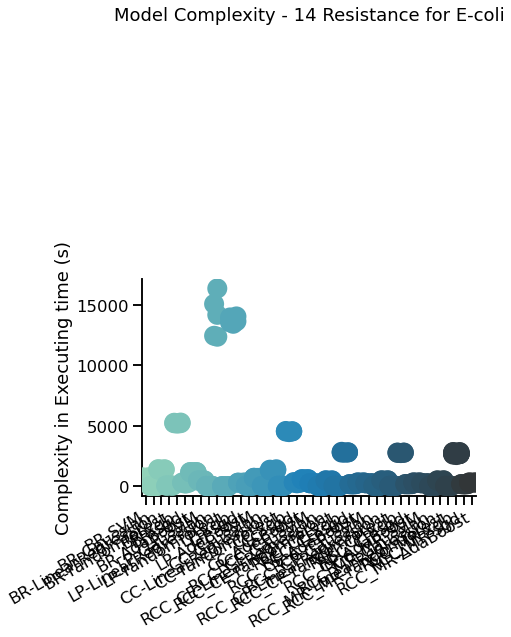

In [68]:
plt.title("Model Complexity - 14 Resistance for E-coli", y=2.16)
sb.swarmplot(x=methods, y=times, palette="YlGnBu_d", size=20)
sb.despine()
plt.ylabel("Complexity in Executing time (s)")
plt.xticks(rotation=30, ha="right")

In [69]:
times

array([7.11265625e+02, 7.05000000e+02, 7.08671875e+02, 7.25937500e+02,
       7.21187500e+02, 1.25156250e+01, 1.25468750e+01, 1.25156250e+01,
       1.25000000e+01, 1.26406250e+01, 1.38978125e+03, 1.38514062e+03,
       1.37534375e+03, 1.36712500e+03, 1.40882812e+03, 4.83125000e+01,
       4.73125000e+01, 4.72656250e+01, 4.76250000e+01, 4.78437500e+01,
       5.18115625e+03, 5.21840625e+03, 5.21125000e+03, 5.25431250e+03,
       5.26867188e+03, 2.85265625e+02, 2.10703125e+02, 3.08125000e+02,
       2.75468750e+02, 3.05343750e+02, 1.16015625e+03, 1.16370312e+03,
       1.16223438e+03, 1.16198438e+03, 1.16176562e+03, 4.78765625e+02,
       4.52343750e+02, 4.40578125e+02, 4.68281250e+02, 4.72296875e+02,
       1.76875000e+01, 1.71250000e+01, 1.72968750e+01, 1.77968750e+01,
       1.81875000e+01, 1.23821719e+04, 1.50954688e+04, 1.24590781e+04,
       1.41936406e+04, 1.63791250e+04, 3.51562500e+00, 2.98437500e+00,
       3.03125000e+00, 3.09375000e+00, 3.07812500e+00, 1.36587344e+04,
      

In [70]:
methods

array(['BR-SVM', 'BR-SVM', 'BR-SVM', 'BR-SVM', 'BR-SVM', 'BR-Gaussian',
       'BR-Gaussian', 'BR-Gaussian', 'BR-Gaussian', 'BR-Gaussian',
       'BR-LinearRegression', 'BR-LinearRegression',
       'BR-LinearRegression', 'BR-LinearRegression',
       'BR-LinearRegression', 'BR-randomforest', 'BR-randomforest',
       'BR-randomforest', 'BR-randomforest', 'BR-randomforest', 'BR-xgb',
       'BR-xgb', 'BR-xgb', 'BR-xgb', 'BR-xgb', 'BR-sgd', 'BR-sgd',
       'BR-sgd', 'BR-sgd', 'BR-sgd', 'BR-AdaBoost', 'BR-AdaBoost',
       'BR-AdaBoost', 'BR-AdaBoost', 'BR-AdaBoost', 'LP-SVM', 'LP-SVM',
       'LP-SVM', 'LP-SVM', 'LP-SVM', 'LP-Gaussian', 'LP-Gaussian',
       'LP-Gaussian', 'LP-Gaussian', 'LP-Gaussian', 'LP-LinearRegression',
       'LP-LinearRegression', 'LP-LinearRegression',
       'LP-LinearRegression', 'LP-LinearRegression', 'LP-randomforest',
       'LP-randomforest', 'LP-randomforest', 'LP-randomforest',
       'LP-randomforest', 'LP-xgb', 'LP-xgb', 'LP-xgb', 'LP-xgb',
       'LP